In this notebook, I want to compute the uncertainty of the phonon dispersion curves from the bootstrap ensembles.

In [1]:
from pathlib import Path
import pickle
import json
from datetime import datetime
from tqdm import tqdm
import sys
from multiprocessing import Pool

from ase import Atoms
from ase.calculators.kim import KIM
from ase.phonons import Phonons
from ase.visualize import view

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

WORK_DIR = Path().absolute()
sys.path.append(str(WORK_DIR.parent))

In [2]:
# Read setting file
ROOT_DIR = WORK_DIR.parent
with open(ROOT_DIR / "settings.json", "r") as f:
    settings = json.load(f)
partition = settings["partition"]
suffix = "_".join([str(n) for n in settings["Nnodes"]])
RES_DIR = WORK_DIR / "results" / f"{partition}_partition_{suffix}"
if not RES_DIR.exists():
    RES_DIR.mkdir(parents=True)

In [3]:
# Graphene sheet
a0 = 2.466
cell = a0 * np.array([[1, 0, 0], [0.5, np.sqrt(3) / 2, 0], [0, 0, 10]])
positions = np.array([cell[0], 1 / 3 * cell[0] + 1 / 3 * cell[1]])
atoms = Atoms("2C", positions=positions, cell=cell, pbc=[1, 1, 1])
# view(atoms.repeat((4, 4, 1)))

In [4]:
def phonon_wrapper(set_idx):
    sample_dir = RES_DIR / f"{set_idx:03d}"
    modelname = f"DUNN_C_bootstrap_{set_idx:03d}"

    # Phonon calculator
    calc = KIM(modelname)
    ph = Phonons(
        atoms, calc, supercell=(8, 8, 1), delta=0.01, name=sample_dir / "phonon_graphene"
    )
    ph.run()

    # Read forces and assemble the dynamical matrix
    ph.read(acoustic=True)
    # ph.clean()

    path = atoms.cell.bandpath("GMKG", npoints=100)
    bs = ph.get_band_structure(path)
    return bs.energies


with Pool(25) as p:
    energies = np.array(list(p.map(phonon_wrapper, range(100))))

energies = energies[:, 0]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.844e-04*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.187e-04*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.682e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.483e-04*i)


WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.389e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.303e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.772e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.246e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.117e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.574e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.671e-03*i)WARNING, 1 imaginary frequencies at q

WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.586e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.603e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.929e-03*i)

WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.961e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 3.841e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.208e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.705e-03*i)

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.483e-04*i)


WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.807e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.983e-03*i)


WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.175e-03*i)


WARNING, 1 imaginary frequen

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.336e-04*i)WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.983e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.398e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.403e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.790e-03*i)

WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.568e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.701e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.808e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.249e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.027e-04*i)WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.588e-04*i)WARNING, 2 imaginary frequencies at 

WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.049e-02*i)WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.863e-03*i)


WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.938e-03*i)

WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.291e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.170e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.026e-04*i)WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.983e-04*i)WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.251e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.024e-03*i)

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.027e-04*i)WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.743e-04*i)
WARNING, 2 imaginary frequencies at

WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.738e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.326e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.700e-04*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.250e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.076e-04*i)WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.779e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.429e-03*i)


WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.992e-03*i)



WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.736e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.296e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.658e-03*i)WARNING, 1 imaginary frequencies a

WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.242e-03*i)WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.090e-04*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.511e-04*i)


WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.091e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.704e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.729e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.298e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.776e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.389e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.322e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.729e-03*i)WARNING, 1 imaginary frequencies at 

WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.070e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.911e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.490e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.511e-04*i)

WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.139e-03*i)


WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.077e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.971e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.554e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.070e-03*i)WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.741e-04*i)


WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.799e-03*i)


WARNING, 1 imaginary frequencie

WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.275e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.052e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.279e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.803e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.598e-03*i)WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.278e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.578e-04*i)

WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.734e-03*i)

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.509e-04*i)WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.294e-04*i)WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.387e-03*i)
WARNING, 1 imaginary frequencies a

In [5]:
# Get band structure
# Phonon calculator
calc = KIM("DUNN_C_bootstrap_000")
ph = Phonons(
    atoms,
    calc,
    supercell=(8, 8, 1),
    delta=0.01,
    name=RES_DIR / "000" / "phonon_graphene",
)
ph.run()
ph.read(acoustic=True)
path = atoms.cell.bandpath("GMKG", npoints=100)
bs = ph.get_band_structure(path)

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.814e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.160e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.705e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.705e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.069e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.814e-04*i)


In [6]:
# Convert to THz
conversion = 4.136e-3 # 1 Thz = 4.136 meV
energies /= conversion

labels = list(bs.get_labels())
labels[2] = [r"$\Gamma$", r"$M$", r"$K$", r"$\Gamma$"]
mean_energies = np.mean(energies, axis=0)
error_energies = np.std(energies, axis=0)

In [7]:
# Export the data needed to plot the result
plot_data_dict = {
    "energies": {"values": energies, "metadata": "Phonon dispersion energies in THz"},
    "labels": labels,
}
with open(RES_DIR / "uncertainty_phonon_dispersion_graphene.pkl", "wb") as f:
    pickle.dump(plot_data_dict, f, protocol=4)

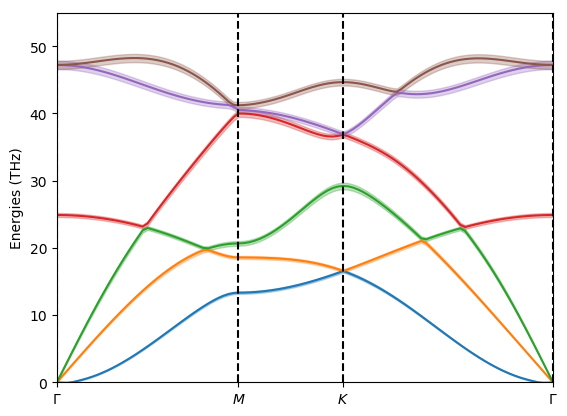

In [8]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
plt.figure()

for ii, eng in enumerate(mean_energies.T):
    plt.fill_between(
        labels[0],
        eng - error_energies[:, ii],
        eng + error_energies[:, ii],
        color=colors[ii],
        alpha=0.3,
    )
    plt.plot(labels[0], eng, c=colors[ii])

for xcoord, name in zip(labels[1], labels[2]):
    plt.axvline(xcoord, c="k", ls="--")
plt.xticks(labels[1], labels[2])
plt.xlim(labels[1][[0, -1]])
plt.ylim(0, 55)
plt.ylabel("Energies (THz)")
plt.show()